In [65]:
# Execute this cell to reset the plots and reload graphing code
%run analysis_script.py
%matplotlib inline 

CE -> Setting up -> Training with preprocessing and random  mask

peak train_loss: 0.0044 in epoch: 86
peak val_loss: 0.0031 in epoch: 82


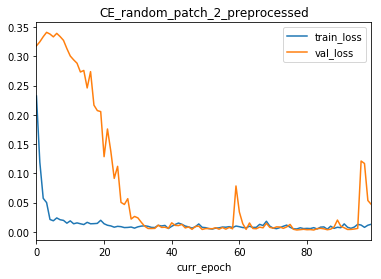

In [53]:
experiment_name = "CE_random_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

peak train_loss: 0.0022 in epoch: 96
peak val_loss: 0.0054 in epoch: 47


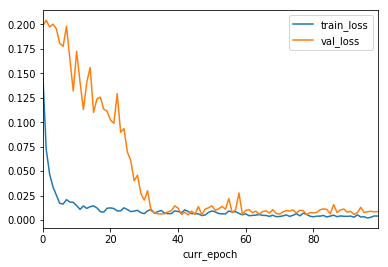

In [36]:
experiment_name = "CE_central_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up -> DTD

peak train_loss: 0.0854 in epoch: 95
peak val_loss: 0.0807 in epoch: 94


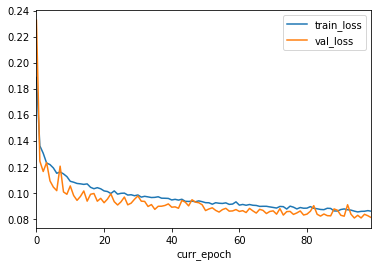

In [37]:
experiment_name = "CE_DTD_random_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

Min train_loss: 0.0192 in epoch: 92
Min val_loss: 0.1104 in epoch: 97


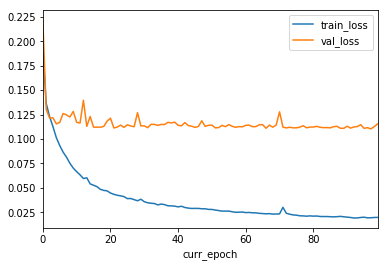

In [15]:
experiment_name = "CE_DTD_central_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

Min train_loss: 0.0179 in epoch: 98
Min val_loss: 0.1006 in epoch: 98


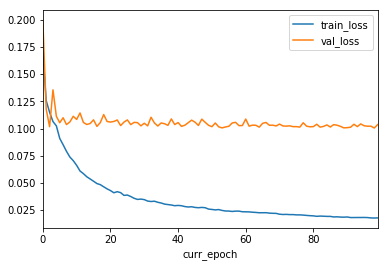

In [16]:
experiment_name = "CE_DTD_resize_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up ->Mias resize

Min train_loss: 0.0040 in epoch: 83
Min val_loss: 0.0203 in epoch: 93


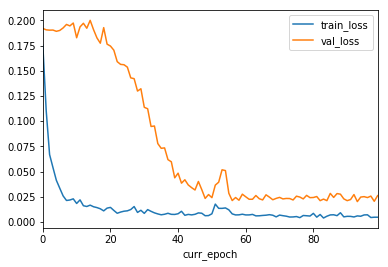

In [17]:
experiment_name = "CE_Mias_resize_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

In [51]:
## test table
experiment_names=[
    "CE_Mias_resize_test_1",
    "CE_DTD_resize_test_1",
    "CE_random_patch_2_preprocessed",
]

ns = [1,1,1]
print_table_peak_values(experiment_names, ns) 

,experiment,train_loss,val_loss
0,CE_Mias_resize_test_1,0.00403974,0.0203068
0,CE_DTD_resize_test_1,0.0178537,0.100596
0,CE_random_patch_2_preprocessed,0.00435275,0.00306802


experiments -> CE -> all these improvements 

peak train_loss: 0.0866 in epoch: 199
peak val_loss: 0.0836 in epoch: 196


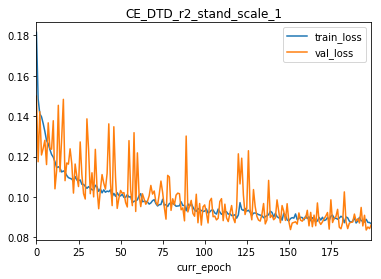

peak train_loss: 0.1066 in epoch: 198
peak val_loss: 0.1060 in epoch: 196


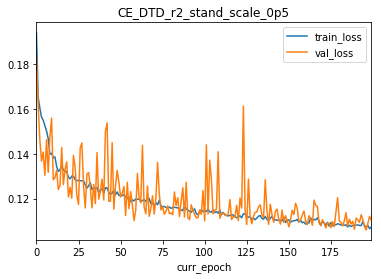

peak train_loss: 0.0596 in epoch: 190
peak val_loss: 0.0580 in epoch: 195


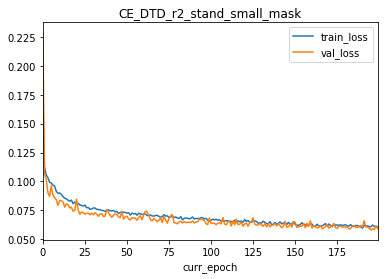

peak train_loss: 0.0888 in epoch: 189
peak val_loss: 0.0901 in epoch: 177


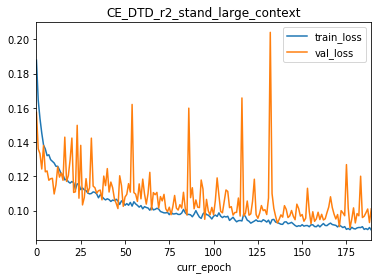

peak train_accuracy: 0.0467 in epoch: 198
peak train_loss: 4.5766 in epoch: 197
peak train_map_mse_range11: 0.1769 in epoch: 194
peak val_accuracy: 0.0404 in epoch: 155
peak val_loss: 4.5526 in epoch: 196
peak val_map_mse_range11: 0.1567 in epoch: 173


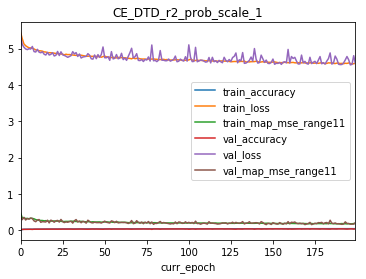

peak train_accuracy: 0.0433 in epoch: 197
peak train_loss: 4.7002 in epoch: 197
peak train_map_mse_range11: 0.2298 in epoch: 197
peak val_accuracy: 0.0367 in epoch: 180
peak val_loss: 4.6904 in epoch: 196
peak val_map_mse_range11: 0.1928 in epoch: 182


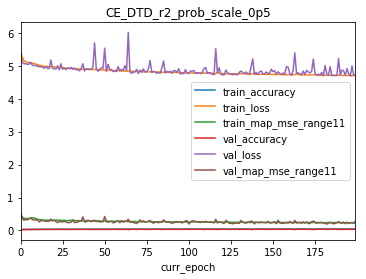

peak train_accuracy: 0.0505 in epoch: 187
peak train_loss: 4.4139 in epoch: 195
peak train_map_mse_range11: 0.1351 in epoch: 185
peak val_accuracy: 0.0442 in epoch: 171
peak val_loss: 4.3939 in epoch: 196
peak val_map_mse_range11: 0.1181 in epoch: 128


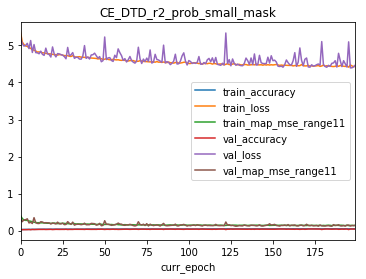

peak train_accuracy: 0.0435 in epoch: 158
peak train_loss: 4.6391 in epoch: 159
peak train_map_mse_range11: 0.1974 in epoch: 157
peak val_accuracy: 0.0402 in epoch: 144
peak val_loss: 4.6096 in epoch: 144
peak val_map_mse_range11: 0.1574 in epoch: 138


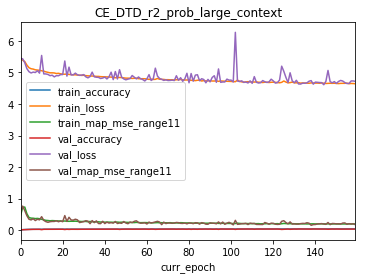

In [66]:
experiment_names = [
"CE_DTD_r2_stand_scale_1",
"CE_DTD_r2_stand_scale_0p5",
"CE_DTD_r2_stand_small_mask",
"CE_DTD_r2_stand_large_context",
"CE_DTD_r2_prob_scale_1",
"CE_DTD_r2_prob_scale_0p5",
"CE_DTD_r2_prob_small_mask",
"CE_DTD_r2_prob_large_context"]

ns = [1]*8

show_traces_multi_exp(experiment_names = experiment_names, ns=ns, variables_to_show = "all", logy=False)